<a href="https://colab.research.google.com/github/krishna574ML/mlproject-1/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df.isna().sum()

Weight    0
Height    0
dtype: int64

Text(0, 0.5, 'Height')

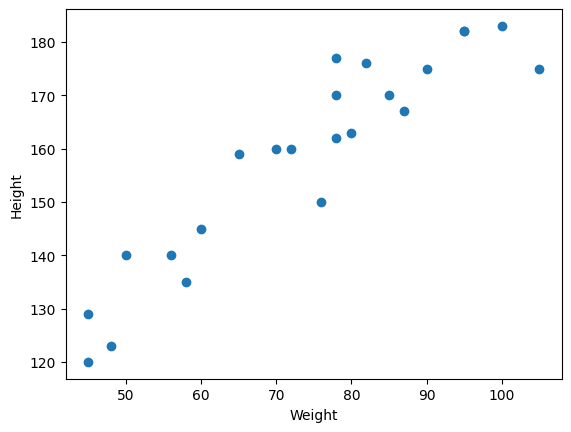

In [14]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [16]:
corr = df.corr()

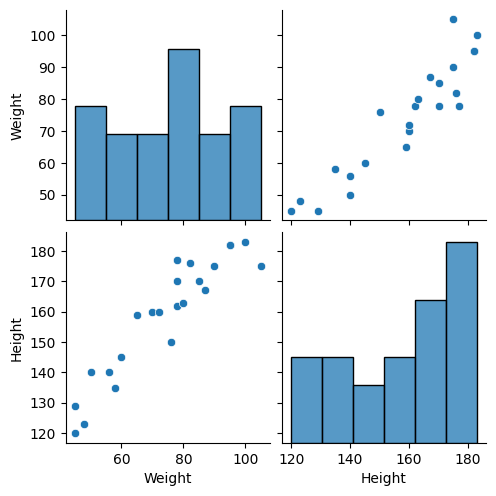

In [17]:
sns.pairplot(df)

In [20]:
## Independent and dependent varaible

X = df.iloc[: , :-1]
y=df.iloc[:,-1]

In [22]:
X.shape

(23, 1)

In [26]:
y.shape

(23,)

In [27]:
## Train test split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)




In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [56]:
model.coef_

array([16.26979346])

In [41]:
y_pred = model.predict(x_test_scaled)

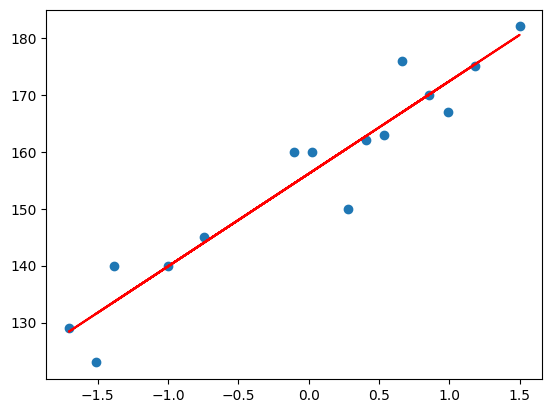

In [46]:
plt.scatter(X_train_scaled , y_train)
plt.plot(X_train_scaled, model.predict(X_train_scaled), color='red')

In [47]:
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
r2 = r2_score(y_test,y_pred)
mean_squared_error(y_test,y_pred)
mean_absolute_error(y_test,y_pred)


8.332521348806658

In [48]:
print(f"R sqaured {r2}") ## Close to 1 is best model
print(f"Mean squared error {mean_squared_error(y_test,y_pred)}")
print(f"Mean absolute error {mean_absolute_error(y_test,y_pred)}")

R sqaured 0.8074173081896224
Mean squared error 91.42562383241722
Mean absolute error 8.332521348806658


In [52]:
import statsmodels.api  as sm

In [53]:
ols_model = sm.OLS(y_train,X_train_scaled).fit()

In [54]:
y_pred_ls  = ols_model.predict(x_test_scaled)

In [55]:
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.011
Model:                            OLS   Adj. R-squared (uncentered):             -0.060
Method:                 Least Squares   F-statistic:                             0.1519
Date:                Fri, 14 Jun 2024   Prob (F-statistic):                       0.703
Time:                        12:31:04   Log-Likelihood:                         -97.053
No. Observations:                  15   AIC:                                      196.1
Df Residuals:                      14   BIC:                                      196.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [61]:
model.predict(scaler.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([156.55032479])